<a href="https://colab.research.google.com/github/musama00/Product-Demand-Prediction-Using-Machine-Learning-FYP-/blob/main/FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv("/content/drive/MyDrive/Walmart.csv")

In [4]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
data["Weekly_Sales"].min()

209986.25

In [7]:
data["Weekly_Sales"].max()

3818686.45

In [8]:
data["Store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [9]:
data["Store"].nunique()

45

In [10]:
data["Store"].value_counts()

,count
Store,
1,143
24,143
26,143
27,143
28,143
29,143
30,143
31,143
32,143


In [11]:
data["Temperature"].nunique()

3528

In [12]:
data["Unemployment"].nunique()

349

In [13]:
data["CPI"].nunique()

2145

In [14]:
data["Holiday_Flag"].value_counts()

,count
Holiday_Flag,
0,5985
1,450


In [16]:
print(f"Data is from {data['Date'].iloc[0]}, to date {data['Date'].iloc[-1]}")

Data is from 05-02-2010, to date 26-10-2012


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [17]:
# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format="%d-%m-%Y")

# Outlier Detection using Z-score
z_scores = np.abs(zscore(data.select_dtypes(include=[np.number])))
outlier_mask = (z_scores > 3)
outlier_counts = outlier_mask.sum()



print(f"Total number of Outliers in our data are {outlier_counts}")


Total number of Outliers in our data are Store             0
Weekly_Sales     31
Holiday_Flag    450
Temperature       1
Fuel_Price        0
CPI               0
Unemployment    219
dtype: int64


In [18]:
# Outlier Detection using IQR
Q1 = data.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = data.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1
outlier_mask_iqr = (data.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | (data.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR))
outlier_counts_iqr = outlier_mask_iqr.sum()

print(f"Total number of Outliers which falls out of IQR range in our data are {outlier_counts}")


Total number of Outliers which falls out of IQR range in our data are Store             0
Weekly_Sales     31
Holiday_Flag    450
Temperature       1
Fuel_Price        0
CPI               0
Unemployment    219
dtype: int64


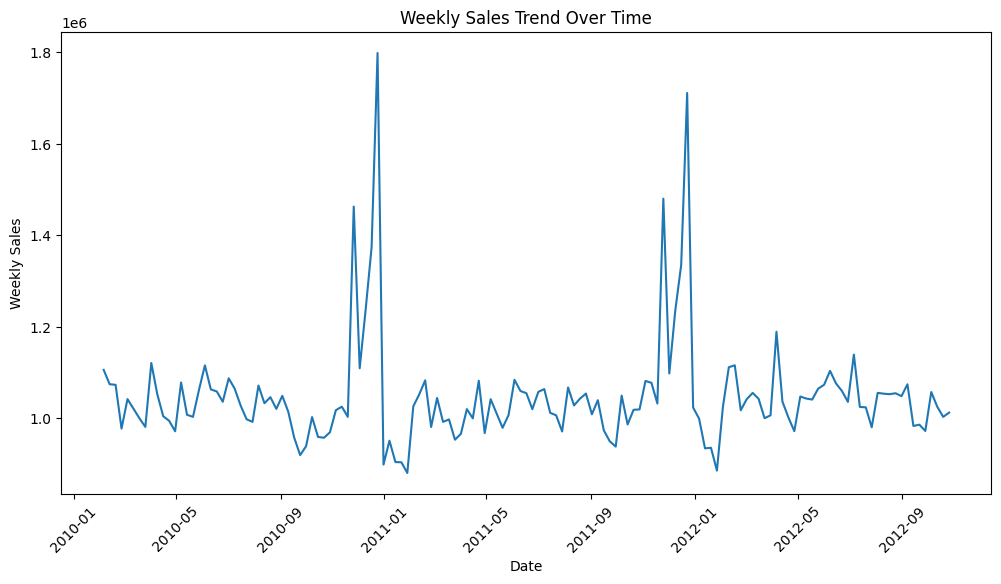

In [19]:
# Visualization: Sales trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=data, errorbar=None)
plt.title("Weekly Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.xticks(rotation=45)
plt.show()



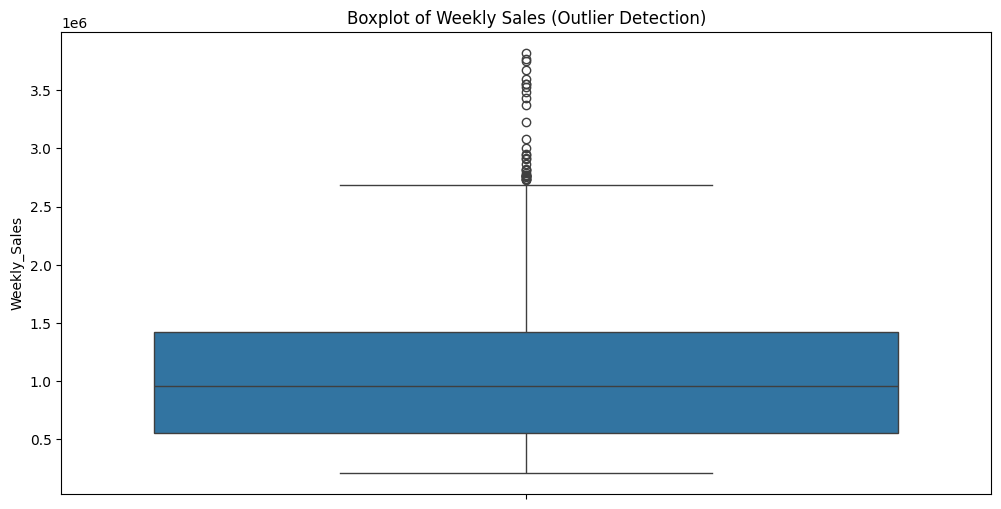

In [20]:
# Visualization: Outlier detection using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(y=data['Weekly_Sales'])
plt.title("Boxplot of Weekly Sales (Outlier Detection)")
plt.show()

In [21]:
# Capping outliers using IQR method
for col in ['Weekly_Sales', 'Temperature', 'Unemployment']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])

# Feature Engineering: Extract Month and Year
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


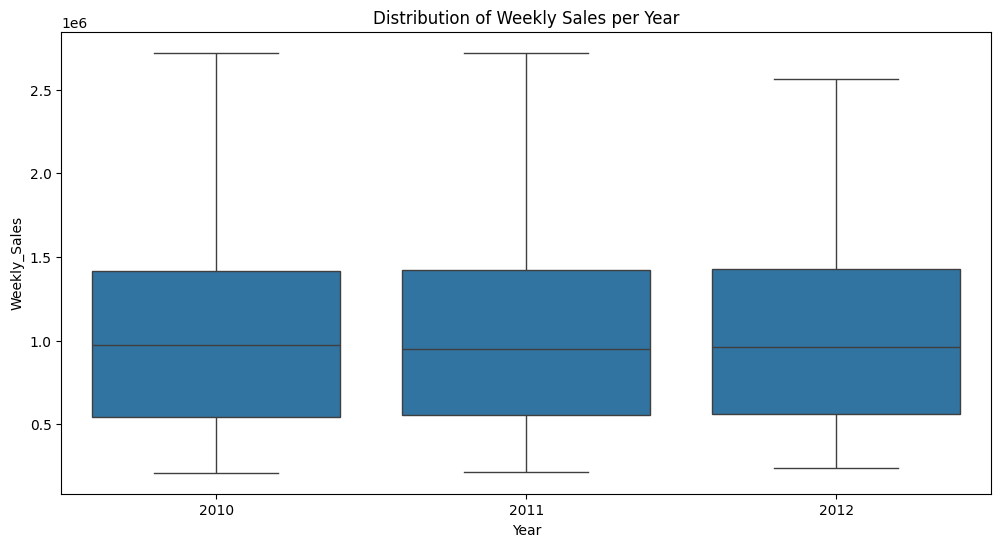

In [22]:
# Visualization: Sales distribution per year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Weekly_Sales', data=data)
plt.title("Distribution of Weekly Sales per Year")
plt.show()



In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Convert Date column to ordinal (if applicable)
# if 'Date' in data.columns:
#     data['Date'] = pd.to_datetime(data['Date']).map(pd.Timestamp.toordinal)

# # Compute correlation only for numeric columns
# corr_matrix = data.corr()

# # Plot heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Feature Correlation Heatmap")
# plt.show()


In [23]:
data.corr()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
Store,1.000000e+00,1.577299e-13,-0.336559,-4.386841e-16,-0.022749,0.060023,-0.209492,0.255964,3.474318e-12,2.910676e-15
Date,1.577299e-13,1.000000e+00,0.007237,-1.328524e-02,0.145356,0.771444,0.077157,-0.259959,9.416680e-01,1.456512e-01
Weekly_Sales,-3.365589e-01,7.236919e-03,1.000000,3.670284e-02,-0.060808,0.010998,-0.072627,-0.108662,-1.634436e-02,7.127976e-02
Holiday_Flag,-4.386841e-16,-1.328524e-02,0.036703,1.000000e+00,-0.155149,-0.078347,-0.002162,0.011204,-5.678257e-02,1.229958e-01
Temperature,-2.274937e-02,1.453564e-01,-0.060808,-1.551494e-01,1.000000,0.144962,0.176960,0.088315,6.428798e-02,2.358122e-01
Fuel_Price,6.002295e-02,7.714439e-01,0.010998,-7.834652e-02,0.144962,1.000000,-0.170642,-0.053428,7.794703e-01,-4.215590e-02
CPI,-2.094919e-01,7.715746e-02,-0.072627,-2.162091e-03,0.176960,-0.170642,1.000000,-0.278542,7.479573e-02,4.979672e-03
Unemployment,2.559643e-01,-2.599593e-01,-0.108662,1.120376e-02,0.088315,-0.053428,-0.278542,1.000000,-2.526376e-01,-1.524365e-02
Year,3.474318e-12,9.416680e-01,-0.016344,-5.678257e-02,0.064288,0.779470,0.074796,-0.252638,1.000000e+00,-1.944645e-01
Month,2.910676e-15,1.456512e-01,0.071280,1.229958e-01,0.235812,-0.042156,0.004980,-0.015244,-1.944645e-01,1.000000e+00


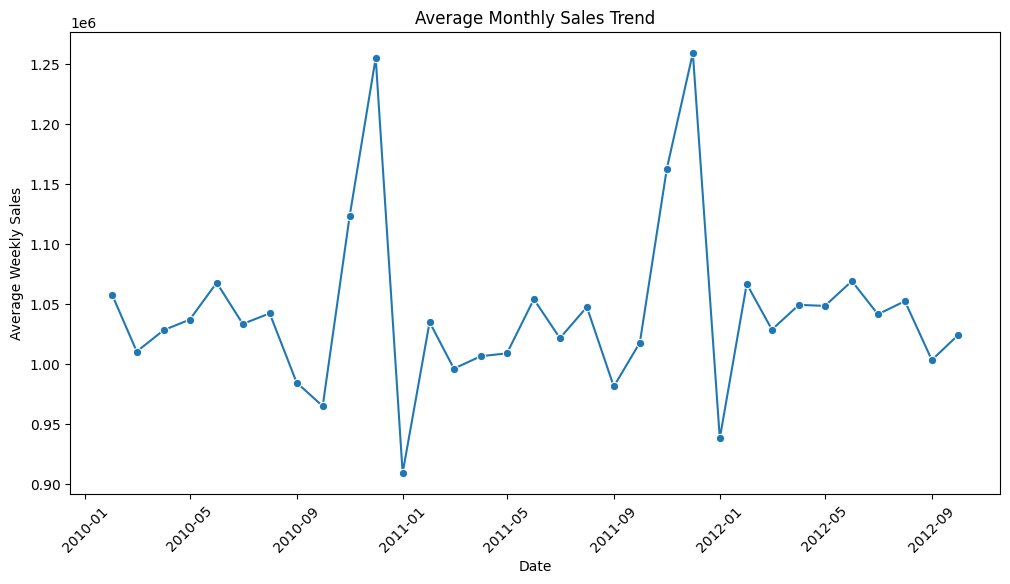

In [24]:
# Visualization: Monthly Sales Trend
plt.figure(figsize=(12, 6))
monthly_sales = data.groupby(['Year', 'Month'])['Weekly_Sales'].mean().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))
sns.lineplot(x='Date', y='Weekly_Sales', data=monthly_sales, marker='o')
plt.title("Average Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Average Weekly Sales")
plt.xticks(rotation=45)
plt.show()



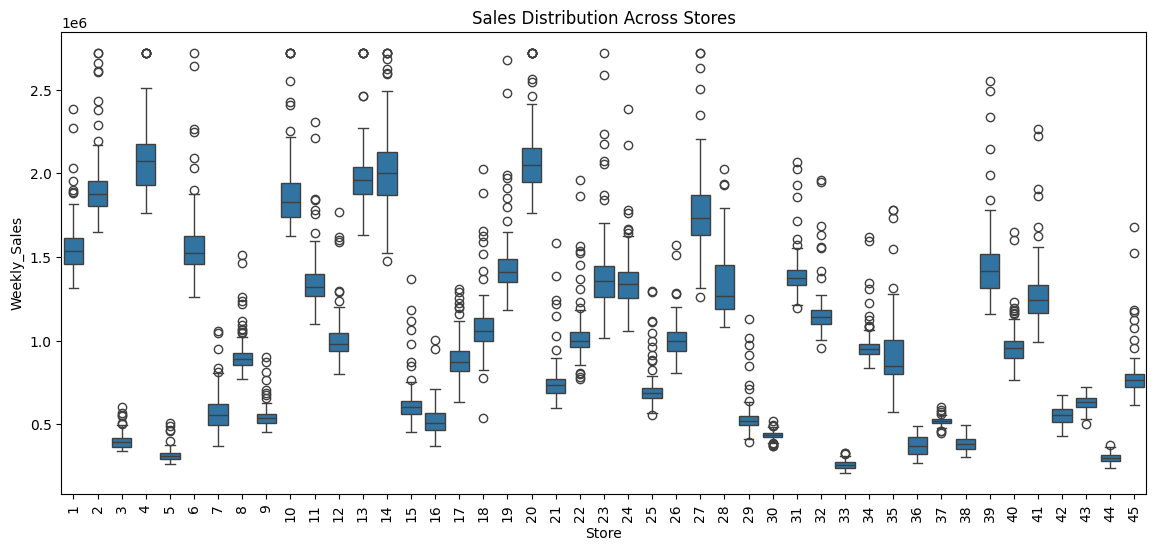

In [25]:
# Visualization: Sales Distribution by Store
plt.figure(figsize=(14, 6))
sns.boxplot(x='Store', y='Weekly_Sales', data=data)
plt.title("Sales Distribution Across Stores")
plt.xticks(rotation=90)
plt.show()



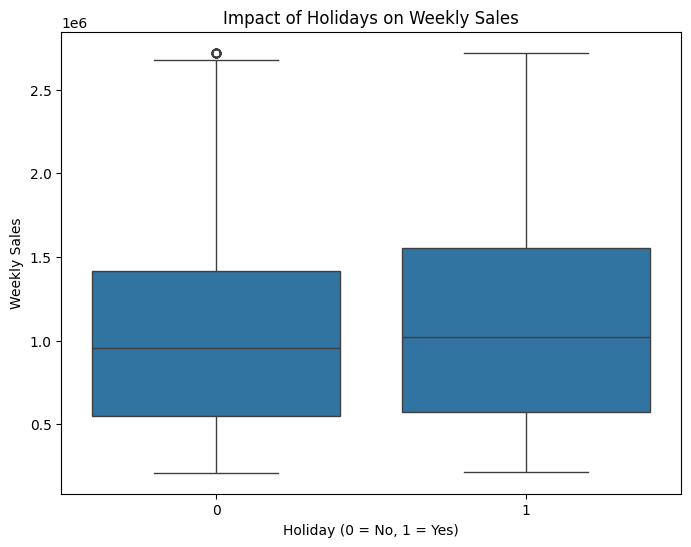

In [26]:
# Visualization: Impact of Holidays on Sales
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
plt.title("Impact of Holidays on Weekly Sales")
plt.xlabel("Holiday (0 = No, 1 = Yes)")
plt.ylabel("Weekly Sales")
plt.show()



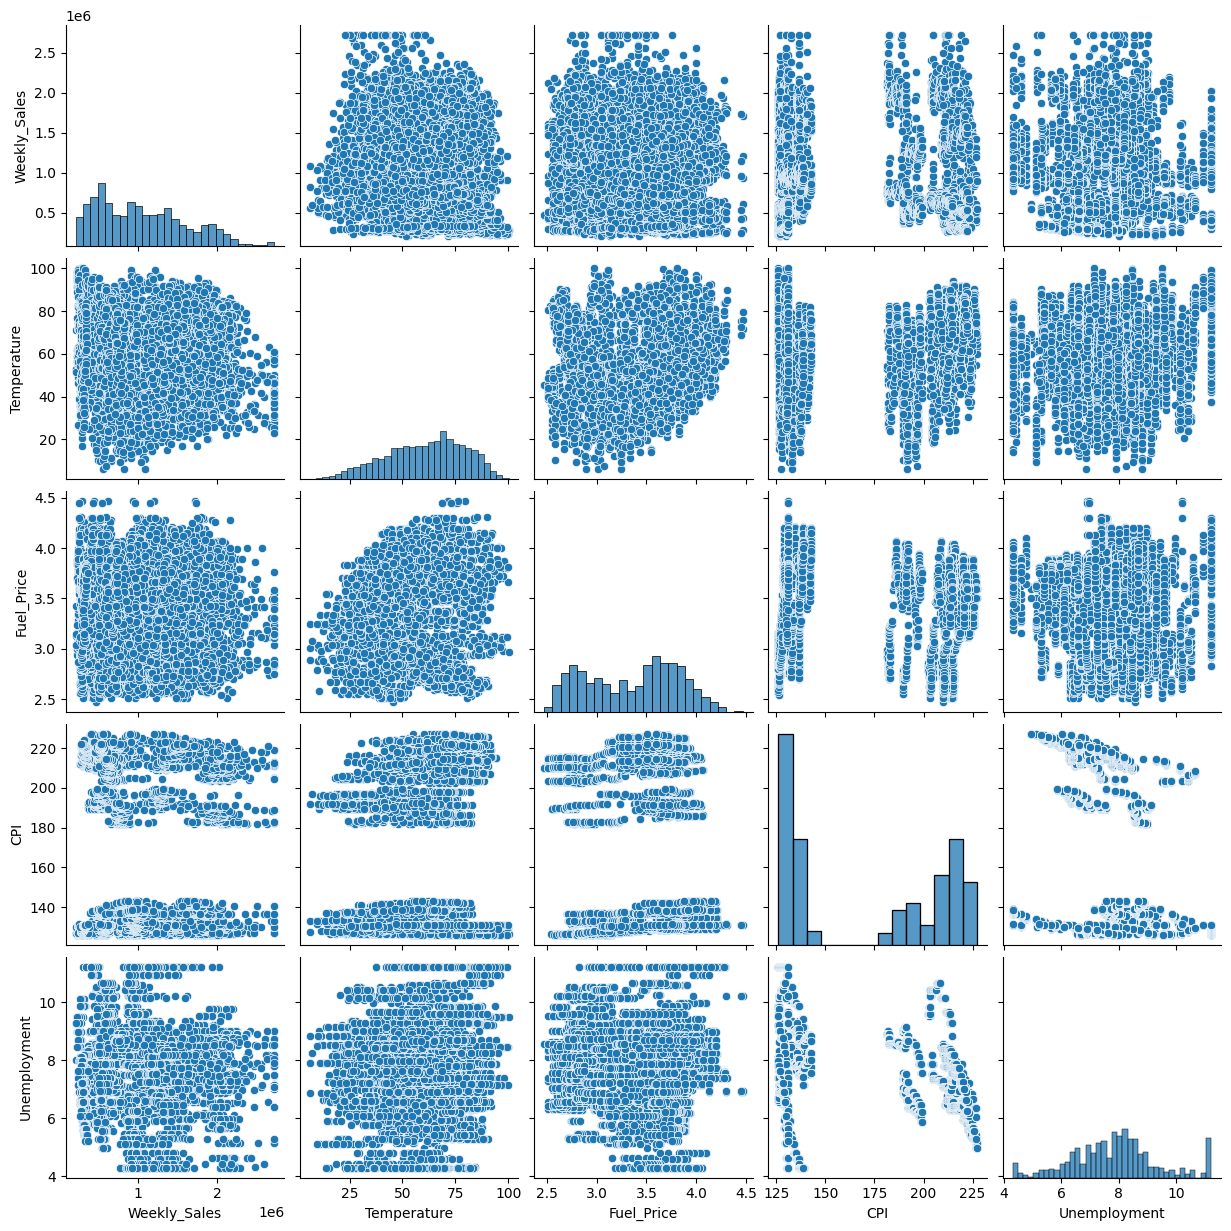

In [27]:
# Pairplot to visualize relationships

sns.pairplot(data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.show()


# Walmart Sales Data Analysis Report
## 1. Data Overview
The dataset contains 6,435 rows and 8 columns representing weekly sales data across multiple stores.
Key attributes include store ID, date, weekly sales, holiday flag, temperature, fuel price, CPI, and unemployment rate.
The date column was converted to datetime format, and new features (Year and Month) were created for trend analysis.
## 2. Data Cleaning & Preprocessing
Missing Values: No missing values were found in the dataset.
Outlier Detection:
Outliers were detected in Weekly_Sales, Temperature, and Unemployment using Z-score and IQR methods.
The extreme values were capped using the IQR method to retain meaningful data.
## 3. Exploratory Data Analysis (EDA)
Sales Trends & Seasonal Analysis
A monthly sales trend shows fluctuations across different months and years, indicating seasonal patterns.
Holidays have a significant impact on sales, with higher median values observed.
Store-Wise Performance
A boxplot of sales per store shows that some stores have consistently higher sales than others.
There is significant variance in store performance, suggesting that store location and other factors influence sales.
Outlier Impact
Outliers in Weekly Sales, Temperature, and Unemployment were identified and capped.
Holiday_Flag had many outliers, but since it is binary, no modifications were made.
## 4. Key Insights
Seasonality: Sales tend to fluctuate over time, with possible peaks during holidays and specific seasons.
Store Variability: Some stores significantly outperform others, possibly due to location and customer traffic.
Holiday Impact: Holidays positively influence sales, leading to noticeable peaks.
External Factors: Unemployment and CPI have minimal direct impact on sales trends.